In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
college_data = pd.read_csv('data/best_value_data.csv', low_memory = False) # Opens our data into a dataframe

In [5]:
for column in college_data.columns:
    print(column)

INSTNM
ST_FIPS
STABBR
LATITUDE
LONGITUDE
SAT_AVG
UNITID
OPEID6
CONTROL
MAIN
CIPCODE
CIPDESC
CREDLEV
CREDDESC
COUNT
DEBTMEDIAN
DEBTPAYMENT10YR
DEBTMEAN
TITLEIVCOUNT
EARNINGSCOUNT
MD_EARN_WNE
IPEDSCOUNT1
IPEDSCOUNT2
BESTVALUE


In [6]:
features = ['UNITID','CIPCODE','SAT_AVG']
y = college_data[['MD_EARN_WNE']]
X = college_data[features]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/Users/seanbarber/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


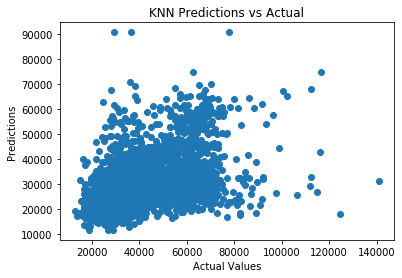

Accuracy: 0.017132779037540943


In [24]:
from sklearn.neighbors import KNeighborsClassifier

# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# predict = clf.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
plt.title("KNN Predictions vs Actual")
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.show()
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

/Users/seanbarber/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


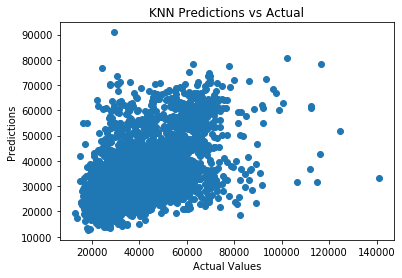

Accuracy: 0.020156210632401108


In [31]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
plt.title("KNN Predictions vs Actual")
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

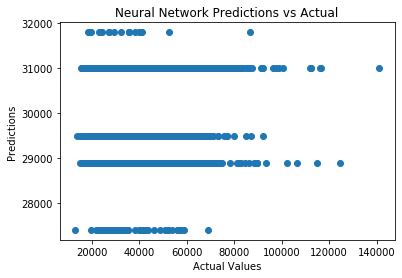

Accuracy: 0.00327538422776518


In [40]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(2,3,2), random_state=1)

clf.fit(X_train, y_train.values.ravel())
predictions = clf.predict(X_test)

plt.title("Neural Network Predictions vs Actual")
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test, predictions))